In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andreylss/residential-and-commercial-energy-cost-dataset")

print("Path to dataset files:", path)

/home/rohnak.agarwal/projects/ml-practice/venv312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 38.3k/38.3k [00:00<00:00, 252kB/s]

Extracting files...
Path to dataset files: /home/rohnak.agarwal/.cache/kagglehub/datasets/andreylss/residential-and-commercial-energy-cost-dataset/versions/1


In [2]:
import os, pandas as pd

df = pd.read_csv(os.path.join(path, "energy_consumption.csv"))
df.head()

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   object 
 1   customer_type     5000 non-null   object 
 2   regions           5000 non-null   object 
 3   building_size_m2  5000 non-null   int64  
 4   occupants         5000 non-null   int64  
 5   energy_cost_brl   5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [4]:
df.describe()

,building_size_m2,occupants,energy_cost_brl
count,5000.00000,5000.000000,5000.000000
mean,39.57620,2.301800,86.874028
std,17.51638,1.032729,24.383261
min,17.00000,1.000000,52.520000
25%,24.00000,1.000000,68.557500
50%,45.00000,2.000000,83.715000
75%,45.00000,3.000000,98.242500
max,77.00000,4.000000,158.610000


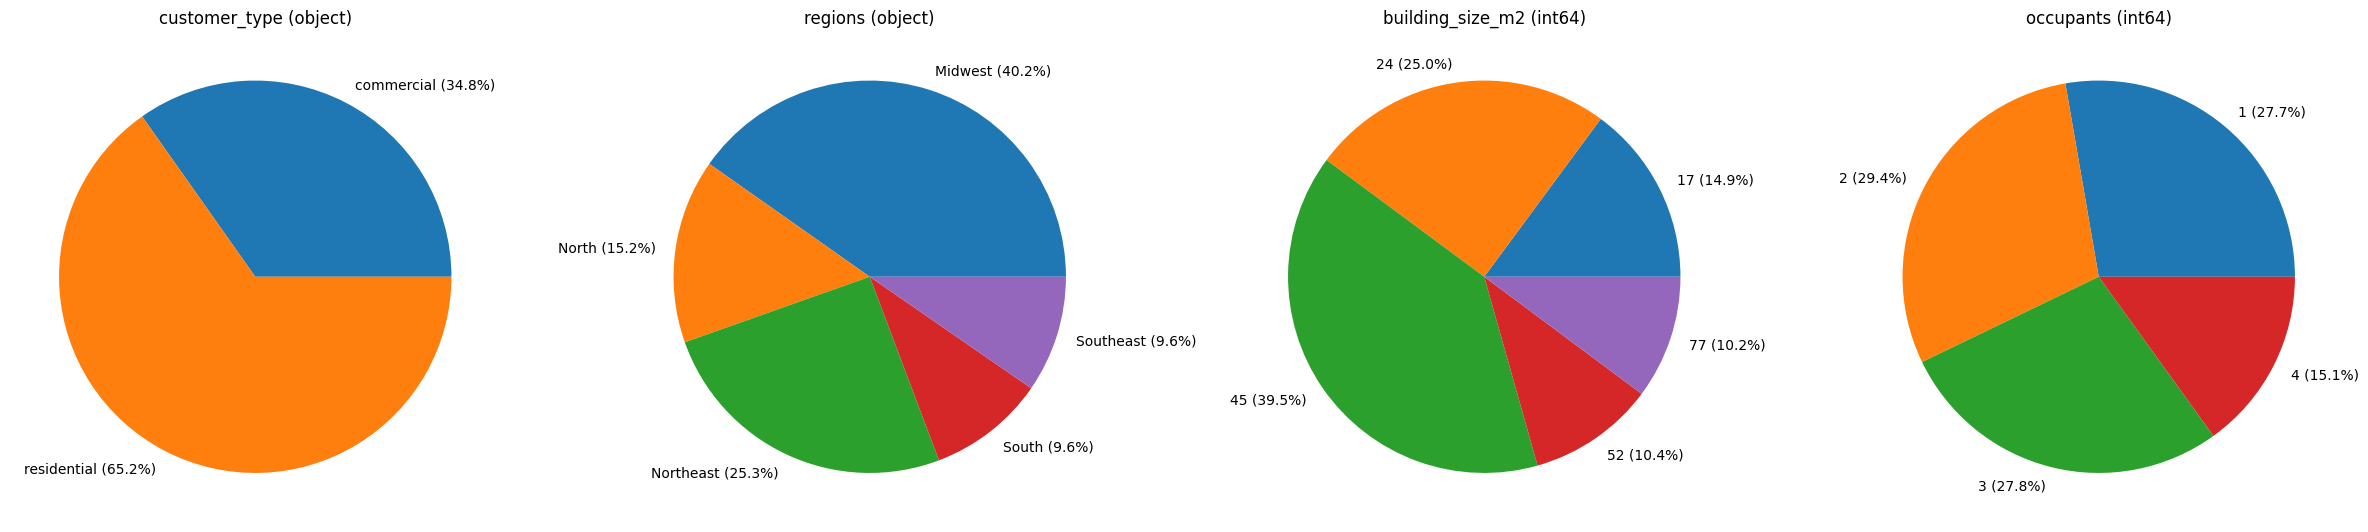

In [9]:
import matplotlib.pyplot as plt

cols = [col for col in df.select_dtypes(["object", int])]
num_plots = len(cols)
cols_per_row = 4
rows = (num_plots + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(6 * cols_per_row, 6 * rows))
axes = axes.flatten()

plot_idx = 0
for col in cols:
    unq_vals = df[col].unique()
    if len(unq_vals) > 100:
        continue
    
    freq_map = {}
    for val in sorted(unq_vals):
        count = len(df[df[col] == val])
        freq_map[f"{val} ({count * 100 / len(df):.1f}%)"] = count

    ax = axes[plot_idx]
    ax.pie(list(freq_map.values()), labels=list(freq_map.keys()))
    ax.set_title(f"{col} ({df[col].dtype})")
    plot_idx += 1

# Hide any unused axes
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x78a36bf02f30>,
 'caps': [<matplotlib.lines.Line2D at 0x78a36bf03440>,
 'boxes': [<matplotlib.lines.Line2D at 0x78a36fcdc7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x78a36bf015e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78a36bf03c50>],
 'means': []}

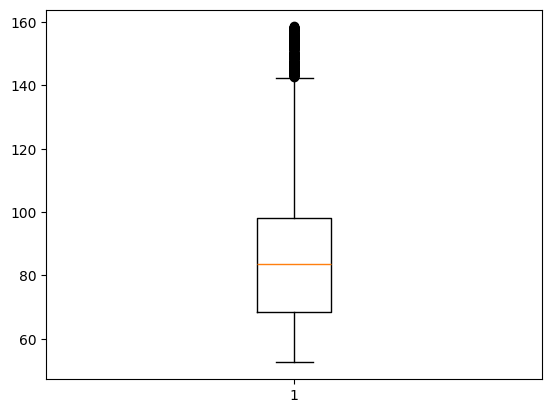

In [10]:
plt.boxplot(df["energy_cost_brl"])